<a href="https://colab.research.google.com/github/NebojsaIvancevic/CNN-dogbreedclassifier/blob/main/Loading_data_in_TensorFlow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

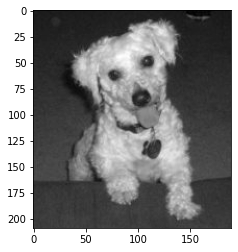

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

# pip install opencv-python

# source = r'C:\Documents and Settings\Some directory\My file.txt'

DATADIR = "/content/drive/MyDrive/Datasets/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [ ]:
print(img_array.shape)

(209, 190)


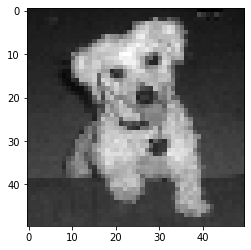

In [ ]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 12520/12520 [46:41<00:00,  4.47it/s]

24965


In [22]:
import random
random.shuffle(training_data)

In [23]:
for sample in training_data[:10]:
  print(sample[1])

1
0
0
0
1
0
0
1
1
0


In [24]:
X = [] #FEATURES
Y = [] #LABELS

In [26]:
for features, label in training_data:
  X.append(features) # needs to be a numpy array
  Y.append(label) # y can stay a list

  
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # -1 value is a catch all meaning it can be any number
                                                   # 1 is grayscale

[[[[222]
   [182]
   [119]
   ...
   [226]
   [244]
   [253]]

  [[232]
   [186]
   [123]
   ...
   [228]
   [245]
   [254]]

  [[229]
   [180]
   [121]
   ...
   [230]
   [249]
   [252]]

  ...

  [[103]
   [124]
   [114]
   ...
   [162]
   [139]
   [216]]

  [[ 77]
   [119]
   [127]
   ...
   [159]
   [147]
   [187]]

  [[139]
   [119]
   [127]
   ...
   [169]
   [143]
   [217]]]]


In [28]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()


pickle_out = open("Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [30]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle","rb")
Y = pickle.load(pickle_in)